In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

%matplotlib inline
import warnings
import os
warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')

# 如何多重索引

In [4]:
os.chdir(r'E:')

In [5]:
data=pd.read_excel('各省统计数据.xlsx',sheet_name=None)

In [6]:
data.keys()
df=data['能源消费总量']
df

,时间,四川,陕西,云南,贵州,重庆,西部
0,2020,21185.9,13512,12981.94,10621.44,8874.54,13435.164
1,2019,20791.0,13478,12158.00,10423.00,8889.00,13147.800
2,2018,19916.0,12900,11590.00,10036.00,8557.00,12599.800
3,2017,19229.0,12549,11164.00,9846.00,8279.00,12213.400
4,2016,18756.0,12146,10726.00,9606.00,7982.00,11843.200
5,2015,18306.0,11746,10425.00,9344.00,7747.00,11513.600
6,2014,19879.0,11222,10455.00,9709.00,8593.00,11971.600
7,2013,19212.0,10610,10072.00,9299.00,8049.00,11448.400
8,2012,20575.0,10611,10434.00,9878.00,9278.00,12155.200
9,2011,19696.0,10612,9540.00,9068.00,8792.00,11541.600


In [7]:
pd.DataFrame(df.set_index('时间').stack().reset_index().sort_values(by=['level_1','时间'],ascending=False).rename(columns={'level_1':'地区',0:'能源消费总量'}))

,时间,地区,能源消费总量
1,2020,陕西,13512.0
7,2019,陕西,13478.0
13,2018,陕西,12900.0
19,2017,陕西,12549.0
25,2016,陕西,12146.0
...,...,...,...
38,2014,云南,10455.0
44,2013,云南,10072.0
50,2012,云南,10434.0
56,2011,云南,9540.0


In [9]:
#逆透视的方法，更加简单，变成面板数据
a=df.melt(id_vars='时间',value_vars=['四川','陕西','云南','贵州','重庆','西部'],value_name='能源消费总量').rename(columns={'variable':'地区'})
a

地区,云南,四川,西部,贵州,重庆,陕西
时间,,,,,,
2010,8674.00,17892.0,10642.000,8175.00,7856.00,10613.0
2011,9540.00,19696.0,11541.600,9068.00,8792.00,10612.0
2012,10434.00,20575.0,12155.200,9878.00,9278.00,10611.0
2013,10072.00,19212.0,11448.400,9299.00,8049.00,10610.0
2014,10455.00,19879.0,11971.600,9709.00,8593.00,11222.0
2015,10425.00,18306.0,11513.600,9344.00,7747.00,11746.0
2016,10726.00,18756.0,11843.200,9606.00,7982.00,12146.0
2017,11164.00,19229.0,12213.400,9846.00,8279.00,12549.0
2018,11590.00,19916.0,12599.800,10036.00,8557.00,12900.0


In [16]:
#问题6答案
df1=pd.DataFrame({'地区':[],'时间':[],'能源消费总量':[]})
row=0
for column in data['能源消费总量'].columns[1:]:
    row=row+11
    for rows in range(row-11,row):
        df1.loc[rows,'地区']=column
df1['能源消费总量']=data['能源消费总量'].iloc[:,1:].values.ravel('F')    
df1['时间']=np.tile(data['能源消费总量']['时间'],6)
df1.head(20)

,地区,时间,能源消费总量
0,四川,2020,21185.9
1,四川,2019,20791.0
2,四川,2018,19916.0
3,四川,2017,19229.0
4,四川,2016,18756.0
5,四川,2015,18306.0
6,四川,2014,19879.0
7,四川,2013,19212.0
8,四川,2012,20575.0
9,四川,2011,19696.0


In [6]:
df1['地方财政一般预算支']=data['地方财政一般预算支'].T.iloc[1:,:].values.ravel('F')
df1['从业人员期末人数']=data['从业人员期末人数'].iloc[:,1:].values.ravel('F')
df1['废水排放总量']=data['废水排放总量'].iloc[:,1:].values.ravel('F')
df1['人均GDP']=data['人均GDP'].iloc[:,1:].values.ravel('F')
df1['工业SO2排放量']=data['工业SO2排放量'].iloc[:,1:].values.ravel('F')
df1['氮氧化物排放量']=data['氮氧化物排放量'].iloc[:,1:].values.ravel('F')
df1['化学需氧量排放量']=data['化学需氧量排放量'].T.iloc[1:,:].values.ravel('F')

# 开始进行数据预处理

In [7]:
df1['时间']=df1['时间'].astype('str')#需要将int转成str形式，才能被strptime所识别
df1['时间'] = df1['时间'].apply(lambda x: pd.datetime.strptime(x,'%Y'))#转成时间类型

In [8]:
df1.set_index(['地区','时间'],inplace=True)#设置地区和时间的多重索引

<span class="mark">一定要排完序才能进行多重索引</span>

In [9]:
df1.sort_index(inplace=True)#一定要排完序才能进行索引
df1

能源消费总量 地方财政一般预算支  从业人员期末人数     废水排放总量    人均GDP  工业SO2排放量  \
地区 时间                                                                      
云南 2010-01-01   8674.0   2285.72    2794.0   91992.00  15752.0     50.07   
   2011-01-01   9540.0    2929.6    2844.0  147523.10  19265.0     69.12   
   2012-01-01  10434.0   3572.66    2835.0  154009.74  22195.0     67.22   
   2013-01-01  10072.0   4096.51    2835.0  156583.28  25322.0     66.31   
   2014-01-01  10455.0   4437.98    2859.0  157544.15  27264.0     63.67   
...                ...       ...       ...        ...      ...       ...   
陕西 2016-01-01  12146.0   4389.37    2111.0  166565.04  50398.0     25.02   
   2017-01-01  12549.0   4833.19    2111.0        NaN  57266.0     18.58   
   2018-01-01  12900.0   5302.44    2112.0        NaN  61115.0     14.72   
   2019-01-01  13478.0   5718.52    2114.0        NaN  65506.0     14.33   
   2020-01-01  13512.0   5930.32    2105.0        NaN  66292.0      9.37   

               氮氧化物排放量 化学需氧量排放量  
地区 时间                            
云南 2010-01-01      NaN    89323  
   2011-01-01    54.85   175356  
   2012-01-01    54.43   168633  
   2013-01-01    52.37   167522  
   2014-01-01    49.89   162472  
...                ...      ...  
陕西 2016-01-01    25.02    27010  
   2017-01-01    18.58    18683  
   2018-01-01    14.72    12759  
   2019-01-01    14.33    12013  
   2020-01-01     9.37     9461  

[66 rows x 8 columns]

## idx进行对多重索引的切片操作

In [10]:
from pandas import IndexSlice as idx
df1.loc[idx['云南','20110101':'20140101'],'能源消费总量']

地区  时间        
云南  2011-01-01     9540.0
    2012-01-01    10434.0
    2013-01-01    10072.0
    2014-01-01    10455.0
Name: 能源消费总量, dtype: float64

## 字符串转化为dateframe

In [2]:
df=pd.DataFrame({'时间':['2010.01.01 08:00:05','2011.01.01 09:00:10','2012.01.01 10:00:15','2013.01.01 11:00:20']})

In [5]:
df.reset_index(drop=True)

,时间
0,2010.01.01 08:00:05
1,2011.01.01 09:00:10
2,2012.01.01 10:00:15
3,2013.01.01 11:00:20


In [25]:
import datetime
df['时间'].apply(datetime.datetime.strptime,args=['%Y.%m.%d %H:%M:%S'])

0   2010-01-01 08:00:05
1   2011-01-01 09:00:10
2   2012-01-01 10:00:15
3   2013-01-01 11:00:20
Name: 时间, dtype: datetime64[ns]

In [26]:
df['时间'].apply(lambda x :pd.datetime.strptime(x,'%Y.%m.%d %H:%M:%S'))

0   2010-01-01 08:00:05
1   2011-01-01 09:00:10
2   2012-01-01 10:00:15
3   2013-01-01 11:00:20
Name: 时间, dtype: datetime64[ns]

# 研究seaborn

In [2]:
import seaborn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
data=seaborn.load_dataset('tips')
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 左连接

In [84]:
df1=pd.DataFrame({'姓名':['小明','小明','杰克','小谢','杰克','小明'],
                 '语文成绩':np.random.randint(80,95,6)})
df2=pd.DataFrame({'姓名':['杰克','小明','杰克','小明','美羊羊'],
                 '数学成绩':np.random.randint(85,95,5)})

In [83]:
pd.merge(df1,df2,on='姓名',how='left')

,姓名,语文成绩,数学成绩
0,小明,85,89.0
1,小明,85,88.0
2,小明,90,89.0
3,小明,90,88.0
4,杰克,85,94.0
5,杰克,85,87.0
6,小谢,94,NaN
7,杰克,85,94.0
8,杰克,85,87.0
9,小明,89,89.0


## 对表内category类型的变量进行计数统计

In [86]:
data.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [96]:
[data[column].value_counts() for column in data.select_dtypes('category').columns]

[Male      157
 Female     87
 Name: sex, dtype: int64,
 No     151
 Yes     93
 Name: smoker, dtype: int64,
 Sat     87
 Sun     76
 Thur    62
 Fri     19
 Name: day, dtype: int64,
 Dinner    176
 Lunch      68
 Name: time, dtype: int64]

## 字符串分裂

In [101]:
df=pd.DataFrame({'电影名称':['熊出没,红海行动,奥特曼大战怪兽,泰坦尼克号','憨豆先生,火影忍者,海贼王,釜山行']})
df

,电影名称
0,"熊出没,红海行动,奥特曼大战怪兽,泰坦尼克号"
1,"憨豆先生,火影忍者,海贼王,釜山行"


In [103]:
df['电影名称'].str.split(',',expand=True)

,0,1,2,3
0,熊出没,红海行动,奥特曼大战怪兽,泰坦尼克号
1,憨豆先生,火影忍者,海贼王,釜山行


# displot绘图

In [104]:
import seaborn
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
seaborn.set_theme(style='whitegrid')

In [108]:
data=seaborn.load_dataset('tips')
data.head(5)#这是一个餐饮店的销售数据，total_bill、tip代表顾客消费金额和支付的小费，sex为性别,smoker代表是否吸烟
#day代表星期几消费的，time代表是午餐/晚餐,size为每桌顾客人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 可视化顾客消费金额和餐厅客流量巅峰值
根据这里老板可以多准备食材，分配员工数量

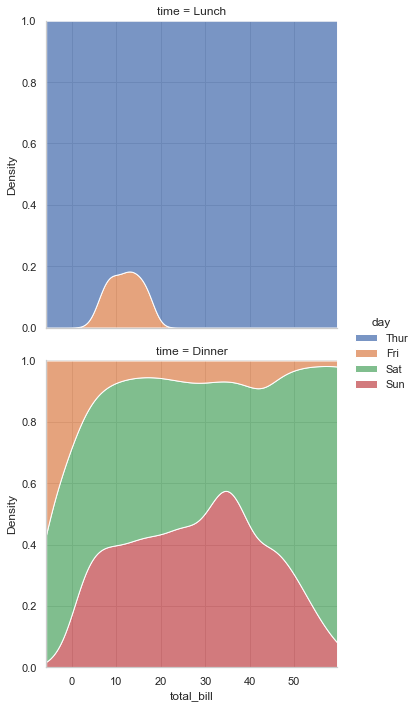

In [135]:
seaborn.set_theme(style='whitegrid')
seaborn.displot(data=data,x='total_bill',hue='day',row='time',kind='kde',multiple='fill')
#顾客只在星期4和5的中午在该餐厅用餐,其余时间不会,且大部分消费金额集中在星期4
#顾客在星期567的晚上在该餐厅用餐,且顾客在星期六的时候会消费大量的金额(40-50),中等消费(30-40)集中在星期天,低等消费的占比也大部分处于星期六

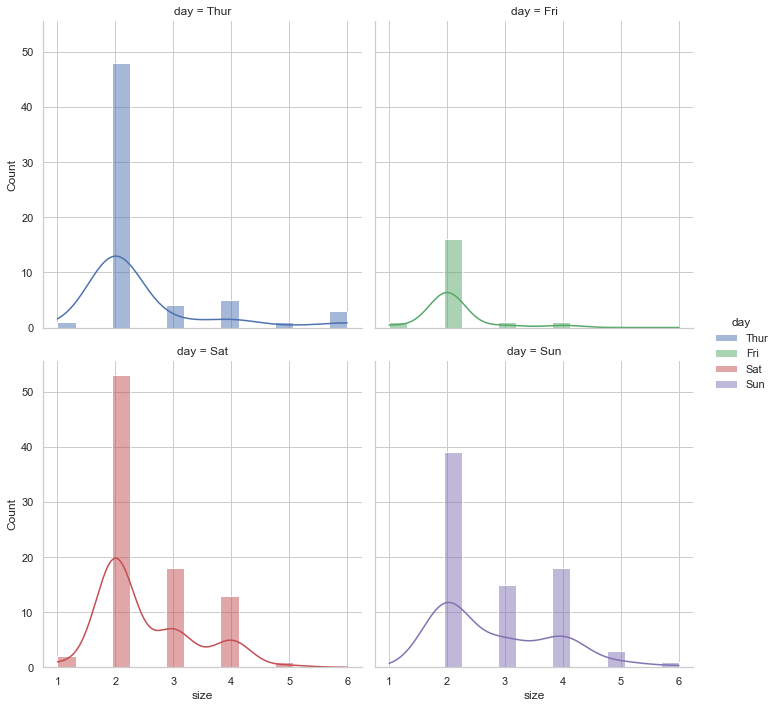

In [137]:
plt.style.use('seaborn-deep')
seaborn.displot(data=data,x='size',hue='day',col='day',col_wrap=2,kind='hist',kde=True)#kde是不同星期下的核密度曲线
#双人用餐的次数是最多的(所有星期)
#星期六和星期天的3人和4人用餐有明显的提升(相对于星期4和5)

## 可视化不同人群支付小费的情况

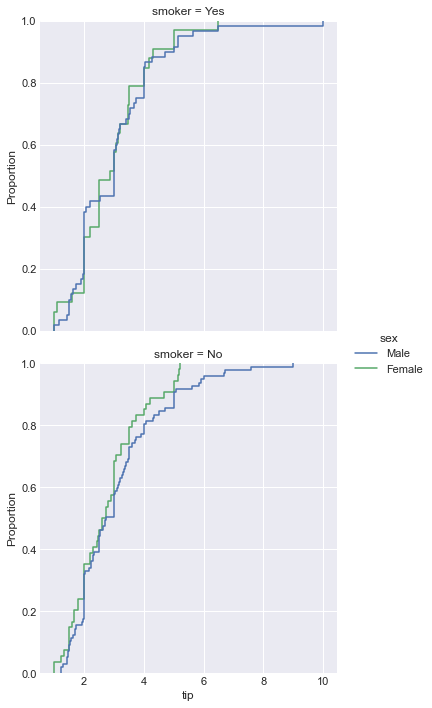

In [134]:
#绘制tip，我把他当成顾客的满意度，也就是餐厅的服务态度水平
plt.style.use('seaborn-darkgrid')
seaborn.displot(data=data,x='tip',hue='sex',row='smoker',kind='ecdf')
#没有吸烟的人，女性比男生明显支付更少的小费
#对于有吸烟的人，女性和男性在支付小费上没有较大的差异，有时女性多，有时女性多,且这类人支付的费用比没有吸烟的人更多。

## np.meshgrid函数

In [31]:
import numpy as np
#该meshgrid是生成网格点的，np.meshgrid(x,y)就是把x和y进行复制
x=np.linspace(-10,9,20)#行是20个
y=np.linspace(-5,4,10)#列是10个
X,Y=np.meshgrid(x,y)

In [35]:
import pandas as pd
pd.DataFrame(np.c_[X.ravel(),Y.ravel()])

,0,1
0,-10.0,-5.0
1,-9.0,-5.0
2,-8.0,-5.0
3,-7.0,-5.0
4,-6.0,-5.0
...,...,...
195,5.0,4.0
196,6.0,4.0
197,7.0,4.0
198,8.0,4.0


# 文本计数分析

In [1]:
import pandas as pd
data=pd.DataFrame({'电影名称':['熊出没,奥特曼大战怪兽,熊出没','红海行动,釜山行,釜山行,釜山行','海贼王,火影忍者,火影忍者','泰坦尼克号,憨豆先生,奥特曼大战怪兽','泰坦尼克号,釜山行,泰坦尼克号']},index=
                   ['小明这个月看过的电影','小红这个月看过的电影','小白这个月看过的电影','小黑这个月看过的电影','小蓝这个月看过的电影'])
data.index.names=['用户状态']
data

,电影名称
用户状态,
小明这个月看过的电影,"熊出没,奥特曼大战怪兽,熊出没"
小红这个月看过的电影,"红海行动,釜山行,釜山行,釜山行"
小白这个月看过的电影,"海贼王,火影忍者,火影忍者"
小黑这个月看过的电影,"泰坦尼克号,憨豆先生,奥特曼大战怪兽"
小蓝这个月看过的电影,"泰坦尼克号,釜山行,泰坦尼克号"


In [10]:
data['电影名称'].str.get_dummies(',')

,奥特曼大战怪兽,憨豆先生,泰坦尼克号,海贼王,火影忍者,熊出没,红海行动,釜山行
用户状态,,,,,,,,
小明这个月看过的电影,1,0,0,0,0,1,0,0
小红这个月看过的电影,0,0,0,0,0,0,1,1
小白这个月看过的电影,0,0,0,1,1,0,0,0
小黑这个月看过的电影,1,1,1,0,0,0,0,0
小蓝这个月看过的电影,0,0,1,0,0,0,0,1


In [103]:
from sklearn.feature_extraction.text import CountVectorizer
model=CountVectorizer()
pd.DataFrame(model.fit_transform(data['电影名称'].tolist()).toarray(),columns=model.get_feature_names(),index=data.index)

,奥特曼大战怪兽,憨豆先生,泰坦尼克号,海贼王,火影忍者,熊出没,红海行动,釜山行
用户状态,,,,,,,,
小明这个月看过的电影,1,0,0,0,0,2,0,0
小红这个月看过的电影,0,0,0,0,0,0,1,3
小白这个月看过的电影,0,0,0,1,2,0,0,0
小黑这个月看过的电影,1,1,1,0,0,0,0,0
小蓝这个月看过的电影,0,0,2,0,0,0,0,1


## 时间采样

In [108]:
data=pd.DataFrame({'当日温度':np.random.randint(15,35,100)},index=pd.date_range('20220101',periods=100,freq='D'))

In [110]:
data.head()

,当日温度
2022-01-01,30
2022-01-02,20
2022-01-03,28
2022-01-04,24
2022-01-05,23


In [116]:
data.resample('M').agg(['mean','std']).rename(columns={'mean':'均值','std':'标准差'})#时间采样

当日温度          
                   均值       标准差
2022-01-31  26.000000  5.310367
2022-02-28  22.785714  5.328867
2022-03-31  24.612903  6.113795
2022-04-30  24.000000  6.716481

## 词云图

In [1]:
import jieba
import wordcloud
import warnings 
warnings.filterwarnings('ignore')

In [3]:
txt='对于小朋友来说太幼稚， 但是对于成年人来说，这些待映动画刚刚好 《深海》：《大圣归来》导演田晓鹏 新作 《铃芽户缔》：《你的名字》导演新海诚 新作 《灌篮高手新剧场版》：迟到20年的礼物 《超级马力欧兄弟大电影》：任天堂38岁顶流水管工再登大荧幕 《疯狂元素城》：皮克斯第27部长片 《冰上的尤里 剧场版》：维克托重回巅峰17岁 《大护法2》：对于小朋友来说还是太超过 《你想活出怎样的人生》：宫崎骏再一次“封山” 《奇异世界》：迪士尼《超能陆战队》导演新作 《头脑特工队2》：皮克斯大作续集 《疯狂动物城+》：迪士尼Zootopia世界衍生剧集 《心愿》：迪士尼一百周年新公主 《埃利奥》：皮克斯 《寻梦环游记》导演新作 《长安三万里》：追光动画新作，与李白回忆唐朝 《铸剑少年》：中国少年三部曲，梦回宋朝 《逐日少年》：中国少年三部曲，畅想未来 《奈何》： 东方梦工厂新作，孟婆的前世今生 《极岸》： 东方梦工厂新作，科幻+悬疑+冒险 《星愿》： 东方梦工厂新作，玄学还愿'
w=wordcloud.WordCloud(width=1000,font_path='msyh.ttc',height=700,background_color='white').generate(''.join(jieba.lcut(txt)))
w.to_file('picture.png')

对于小朋友来说太幼稚，
但是对于成年人来说，这些待映动画刚刚好
《深海》：《大圣归来》导演田晓鹏 新作
《铃芽户缔》：《你的名字》导演新海诚 新作
《灌篮高手新剧场版》：迟到20年的礼物
《超级马力欧兄弟大电影》：任天堂38岁顶流水管工再登大荧幕
《疯狂元素城》：皮克斯第27部长片
《冰上的尤里 剧场版》：维克托重回巅峰17岁
《大护法2》：对于小朋友来说还是太超过
《你想活出怎样的人生》：宫崎骏再一次“封山”
《奇异世界》：迪士尼《超能陆战队》导演新作
《头脑特工队2》：皮克斯大作续集
《疯狂动物城+》：迪士尼Zootopia世界衍生剧集
《心愿》：迪士尼一百周年新公主
《埃利奥》：皮克斯 《寻梦环游记》导演新作
《长安三万里》：追光动画新作，与李白回忆唐朝
《铸剑少年》：中国少年三部曲，梦回宋朝
《逐日少年》：中国少年三部曲，畅想未来
《奈何》： 东方梦工厂新作，孟婆的前世今生
《极岸》： 东方梦工厂新作，科幻+悬疑+冒险
《星愿》： 东方梦工厂新作，玄学还愿

# 使用索引列的人名分组并mean每一组

In [1]:
import pandas as pd
import numpy as np
people=pd.DataFrame(np.random.randint(160,180,5),columns=['身高'],index=['Joe','Steve','Wes','Jim','Travis'])

people.index.name='名称'
people

,身高
名称,
Joe,161
Steve,168
Wes,166
Jim,179
Travis,165


In [3]:
people.groupby([len(i) for i in people.index]).mean()#也可以

,身高
3,168.666667
5,168.000000
6,165.000000


In [2]:
people.groupby(len).mean()

,身高
3,168.666667
5,168.000000
6,165.000000


## 多层索引的groupby

In [31]:
columns=pd.MultiIndex.from_arrays([['US','US','US','JP','JP'],[1,3,5,1,3]],names=['cty','tenor'])
columns

MultiIndex([('US', 1),
            ('US', 3),
            ('US', 5),
            ('JP', 1),
            ('JP', 3)],
           names=['cty', 'tenor'])

In [32]:
hier_df=pd.DataFrame(np.random.randn(4,5),columns=columns)
hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.610609 -0.365097 -1.192615  0.055746 -0.412485
1     -0.508235  0.707413 -1.772341  0.305821 -0.320477
2     -0.284230  0.450222 -0.670951  1.927754  0.057960
3      1.543967  2.484656 -1.411690  0.797653 -0.029364

In [33]:
#根据层级分组，将层级数值或层级名称传给level关键字
hier_df.groupby(level='cty',axis=1).count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## 自定义函数聚合

In [35]:
df=pd.DataFrame({'key1':['a','a','b','b','a'],
                'key2':['one','two','one','two','one'],
                'data1':np.random.randn(5),
                'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.879806,1.229324
1,a,two,0.331246,0.387788
2,b,one,-0.777018,-0.631551
3,b,two,-1.073448,0.884792
4,a,one,0.958890,1.701712


In [38]:
def peak_to_peak(arr):
    return arr.max()-arr.min()

In [59]:
df.groupby('key1')[['data1','data2']].apply(peak_to_peak)#apply无法自动忽略str类型的列，但是agg可以

,data1,data2
key1,,
a,0.627644,1.313924
b,0.296430,1.516343


In [60]:
df.groupby('key1').agg(peak_to_peak)#groupby分组后组合的函数就用agg，agg括号里可以用元组tuple、dict来传递

,data1,data2
key1,,
a,0.627644,1.313924
b,0.296430,1.516343


## 分桶分析

In [92]:
frame=pd.DataFrame({'data1':np.random.randn(1000),'data2':np.random.randn(1000)})
frame

,data1,data2
0,-0.470600,1.128073
1,-0.506651,1.274927
2,1.051578,-1.353985
3,-0.590969,-0.814079
4,-0.368913,0.559852
...,...,...
995,0.082373,1.045506
996,0.114439,-1.263051
997,1.188797,-0.594778
998,-0.120598,-0.305584


In [76]:
def get_stats(group):
    return {'min':group.min(),'max':group.max(),'count':group.count(),'mean':group.mean()}
frame.data2.groupby(pd.cut(frame.data1,4)).apply(get_stats).unstack() # 给字典，

,min,max,count,mean
data1,,,,
"(-3.076, -1.268]",-2.547170,2.458258,107.0,-0.114138
"(-1.268, 0.532]",-3.418748,2.935215,584.0,0.004021
"(0.532, 2.333]",-3.033017,2.384315,298.0,-0.044107
"(2.333, 4.133]",-1.756866,1.557764,11.0,0.151592


## groupby之后排序

In [29]:
data=pd.DataFrame({'ID':np.linspace(1,12,12),
                  '年龄':np.random.randint(30,34,12),
                  '收入':np.random.rand(12)*20000})
data

,ID,年龄,收入
0,1.0,32,9718.159187
1,2.0,31,7588.343203
2,3.0,32,15469.730611
3,4.0,32,2483.517808
4,5.0,31,13862.311753
5,6.0,31,18261.656160
6,7.0,33,11996.379828
7,8.0,31,4005.672268
8,9.0,33,13107.918400
9,10.0,30,7671.248417


In [43]:
data.groupby('年龄').apply(lambda x : x.sort_values('收入',ascending=True)).reset_index(drop=True)

,ID,年龄,收入
0,3.0,30,6959.143056
1,12.0,30,12668.196911
2,8.0,31,16975.992817
3,7.0,32,2878.985712
4,4.0,32,4199.072601
5,11.0,32,6138.888940
6,2.0,32,15628.586330
7,10.0,32,19727.323477
8,1.0,33,3923.572906
9,5.0,33,4179.170394


# 回答问题，关于多层索引

In [2]:
import pandas as pd
a=pd.DataFrame({'code':[1]*3+[2]*3+[3]*3,'证券名称':['张三']*3+['李四']*3+['王五']*3,'杠杆率':[10,16,12,53,45,64,7,2,11],
               'year':[2018,2019,2020]*3})

In [3]:
a

,code,证券名称,杠杆率,year
0,1,张三,10,2018
1,1,张三,16,2019
2,1,张三,12,2020
3,2,李四,53,2018
4,2,李四,45,2019
5,2,李四,64,2020
6,3,王五,7,2018
7,3,王五,2,2019
8,3,王五,11,2020


In [21]:
pd.pivot(index=['code','证券名称'],columns='year',values='杠杆率',data=a)#第一种方法

,year,2018,2019,2020
code,证券名称,,,
1,张三,10,16,12
2,李四,53,45,64
3,王五,7,2,11


In [27]:
a.set_index(['code','证券名称','year']).unstack()#第二种方法

杠杆率          
year      2018 2019 2020
code 证券名称               
1    张三     10   16   12
2    李四     53   45   64
3    王五      7    2   11

In [47]:
df=pd.pivot(index=['code','证券名称'],columns='year',values='杠杆率',data=a)
df

,year,2018,2019,2020
code,证券名称,,,
1,张三,10,16,12
2,李四,53,45,64
3,王五,7,2,11


## 调用

比如调用code=1,张三，2018年的杠杆率

In [48]:
#因为这是个多层索引，所以行索引传入tuple类型
df.loc[(1, '张三'),2018]#比如调用

10

In [1]:
import numpy as np
np.linspace(0.01,0.1,10)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

## 功能包

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

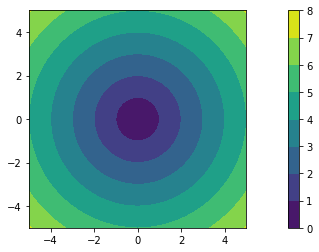

<Figure size 432x288 with 0 Axes>

In [12]:
x = np.linspace(-5, 5, 101)  
y = np.linspace(-5, 5, 101)
xs, ys = np.meshgrid(x, y, sparse=True)
zs = np.sqrt(xs**2 + ys**2)
plt.contourf(x, y, zs)
plt.colorbar()
plt.axis('scaled')
plt.show()
plt.savefig('等高线的图',dpi=600)

$numpy中linspace等差数列的介绍\\
linspace(min,max,number)\\
第一个参数:最小值\\
第二个参数:最大值\\
第三个参数:生成的数字量\\
np.linspace(-5,5,101)\\
生成以d=\frac{(5-(-5))}{101-1}为间隔的101个数\\
最小值为-5，最大值为5$



## factorize

In [14]:
import pandas as pd

$pd.factorize函数的作用：\\
1.代替了sklearn中的LabelEncoder,对中文编码\\
2.也去重了，不用再对DataFrame的某列做一次unique$

In [25]:
data=pd.DataFrame({'球队':['葡萄牙','阿根廷',
                         '葡萄牙','巴西','巴西','阿根廷']})
code,unique = pd.factorize(data.球队)
#code为编码，unique为去重后的球队
data['生成编码']=pd.factorize(data.球队)[0]
print(f'去重后的球队名称为{unique}')
data

去重后的球队名称为Index(['葡萄牙', '阿根廷', '巴西'], dtype='object')


,球队,生成编码
0,葡萄牙,0
1,阿根廷,1
2,葡萄牙,0
3,巴西,2
4,巴西,2
5,阿根廷,1


In [18]:
a=np.arange(1,7).reshape(2,3)
a

array([[1, 2, 3],
       [4, 5, 6]])

In [20]:
#三者生成同样的结果
#以行展开
a.reshape(-1)
a.ravel(order='C')
a.flatten(order='C')

array([1, 2, 3, 4, 5, 6])

In [22]:
#以列展开
a.ravel(order='F')
a.ravel(order='F')

array([1, 4, 2, 5, 3, 6])

$numpy.ravel将高维数组转化为一维数组\\
当参数order='C'(默认),以行展开\\
当参数order='F',以列展开$

In [24]:
np.array([[1,2,3,4,5,6]])

array([[1, 2, 3, 4, 5, 6]])

$该函数比较关键，很多时候建模和绘图的某个参数\\
实际需要1-D的数据，像上面的数组中看着像一维数组\\
实际上是二维，所以可能在建模时候出现错误\\
需要转成1-D数组。$

In [25]:
np.array([[1,2,3,4,5,6]]).ravel()

array([1, 2, 3, 4, 5, 6])

In [ ]:
{"headers":{"Department":["id","revenue","month"]},
 "rows":{"Department":[[1,8000,"Jan"],[2,9000,"Jan"],
                       [3,10000,"Feb"],[1,7000,"Feb"],[1,6000,"Mar"]]}}

In [27]:
import pandas as pd
Department=pd.DataFrame({'id':[1,2,3,1,1],
                        'revenue':[8000,9000,10000,7000,6000],
                        'month':['Jan','Jan','Feb','Feb','Mar']})
Department

,id,revenue,month
0,1,8000,Jan
1,2,9000,Jan
2,3,10000,Feb
3,1,7000,Feb
4,1,6000,Mar


In [33]:
#求每个id下每个月的收入
Department.pivot_table(index='id',
                       columns='month',
                       values='revenue',
                       aggfunc='sum')[['Jan', 'Feb', 'Mar']]

month,Jan,Feb,Mar
id,,,
1,8000.0,7000.0,6000.0
2,9000.0,NaN,NaN
3,NaN,10000.0,NaN


$pd.pivote\_table(data,index,columns,values,aggfunc,fill\_values...)\\
pd.pivot\_table为数据透视表的作用，非常有用\\
本次我将pandas中该函数对比Mysql。\\
该函数参数中,index、columns设置横纵轴(即groupby的作用),\\
values代表要聚合的对象,aggfunc也就是聚合函数(这里是sum)\\
当然你也可以设置mean,max,min...$